<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/Climate/Arctic_beginner_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE SERVICE ARCTIC OCEAN TRAINING

<div style="text-align: right"><i> BEGINNER LEVEL </i></div>

***
<center><h1> First steps with Copernicus Marine Service products, NetCDF files and Python </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Presentation and access to the data](#2.-Presentation-and-access-to-the-data)
    - [2.1. Presentation of the products used](#2.1.-Presentation-of-the-products-used)
    - [2.2. Download from the catalogue](#2.2.-Download-from-the-catalogue)
    - [2.3. Download from motuclient](#2.3.-Download-from-motuclient)
    - [2.4. Download with FTP](#2.4.-Download-with-FTP)
    - [2.5. Use OPeNDAP](#2.5.-Use-OPeNDAP)
- [3. Explore the products with Python](#3.-Explore-the-products-with-Python)
    - [3.1. Required Python modules](#3.1.-Required-Python-modules)
    - [3.2. Load the files](#3.2.-Load-the-files)
    - [3.3. Explore the content of the files](#3.3.-Explore-the-content-of-the-files)
- [4. Study the Arctic Ocean](#4.-Study-the-Arctic-Ocean)
    - [4.1. Subset the dataset along dimensions](#4.1.-Subset-the-dataset-along-dimensions)
    - [4.2. Plot a map](#4.2.-Plot-a-map)
    - [4.3. Specificities of the polar products](#4.3.-Specificities-of-the-polar-products)
    - [4.4. Change the map's projection](#4.4.-Change-the-map's-projection)
    - [4.5. Subset the dataset along coordinates](#4.5.-Subset-the-dataset-along-coordinates)
    - [4.6. Plot a time series](#4.6.-Plot-a-time-series)
    - [4.7. Plot vertical profiles](#4.7.-Plot-vertical-profiles)
    - [4.8. Plot vertical slices](#4.8.-Plot-vertical-slices)
    - [4.9. Create an animation](#4.9.-Create-an-animation)
- [5. Conclusion](#5.-Conclusion)

# 1. Introduction
[Go back to the "Table of contents"](#Table-of-contents)

Welcome to this Copernicus Marine Service training over the Arctic Ocean !

In this Jupyter Notebook, you will learn everything you need to access the Copernicus Marine Service products, manipulate them and create useful working figures. To do so, we are going to follow a basic exercise whose objective will be to analyse the Arctic Ocean condition in several different ways.

Once you are familiar with the methods explained here, you will be able to tackle the second exercise of the workshop which is dedicated to intermediate level users. It will cover a real case scenario : the evolution of the Arctic Ocean currents within climate change.

# 2. Presentation and access to the data
[Go back to the "Table of contents"](#Table-of-contents)

We are going to work with 3 Copernicus Marine Service datasets, taken from model, satellite observation and in-situ observation products. In the following sections, you will learn how to find information on these products and how to access them.

## 2.1. Presentation of the products used
[Go back to the "Table of contents"](#Table-of-contents)

From the Copernicus Marine Service [catalogue](https://resources.marine.copernicus.eu/products), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In this exercise, we are interested in the Arctic Ocean parameters, which we will study from the 3 following products :

- The [*Arctic Ocean Physics Reanalysis*](https://resources.marine.copernicus.eu/product-detail/ARCTIC_MULTIYEAR_PHY_002_003/INFORMATION) model;
- The [*Arctic Ocean - Sea Ice Thickness REPROCESSED*](https://resources.marine.copernicus.eu/product-detail/SEAICE_ARC_SEAICE_L3_REP_OBSERVATIONS_011_013/INFORMATION) satellite observations;
- A *salinity profile* from a profiler instrument.

The links associated to the products will direct you to the catalogue information page, where you can find the description of the product, its temporal and spatial resolution, processing level, temporal coverage and more.

The latter product, the in-situ observation, has been downloaded thanks to these notebooks ( [1](access_in-situ/13-01-NearRealTtime-product-collections-overview.ipynb) & [2](access_in-situ/13-02-NearRealTtime-product-subsetting-download.ipynb) ), which explain how to subset and download in-situ observation products. Have a look at them if you are interested in such products !

<div class="alert alert-block alert-warning">
    <b>Get Copernicus Marine Service User credentials</b>
<hr>
    Whatever way you choose to download the products, you will need to have by your Copernicus Marine Service User credentials. If you are not registered yet, you can get them from <a href="http://marine.copernicus.eu/services-portfolio/register-now/" target="_blank">Copernicus Marine Service registration page</a>. Note that all the input data used in this exercise are however already available in the <code>data/</code> repository.



## 2.2. Download from the catalogue
[Go back to the "Table of contents"](#Table-of-contents)

Copernicus Marine Service products can be subset and downloaded directly from your internet browser on the Copernicus [catalogue](https://resources.marine.copernicus.eu/products). This solution is very user-friendly and is probably the easiest way to access your data.

If you need some help about this service for downloading the products, you can have a look at this [tutorial](https://help-cmems.mercator-ocean.fr/en/articles/4469993-how-to-download-copernicus-marine-data).

## 2.3. Download from *motuclient*
[Go back to the "Table of contents"](#Table-of-contents)

Products may alternatively be downloaded with **motuclient**, a multiplatform python script to automate the extraction of information from the Copernicus Marine Service portal. To get more info on motuclient, you can visit the related [web page](https://help-cmems.mercator-ocean.fr/en/articles/4796533-what-are-the-motu-client-motuclient-and-python-requirements).



<div class="alert alert-block alert-warning">

**TIPS**  
When calling a linux command from a notebook, insert a `!` at the beginning of the command line.

Using *motuclient* you will be able to download data directly within this Jupyter Notebook and the product will be saved in your folder. The following command line, is an example to acess the [*Arctic Ocean Physics Reanalysis*](https://resources.marine.copernicus.eu/product-detail/ARCTIC_MULTIYEAR_PHY_002_003/INFORMATION) model product.  The parameters such as *--longitude-max* enable to subset the product and to select the geographical area, time period, depths and variables you are interested in. You can also set the output directory and file name you like.

Copy the following line into another cell and run it : (*don't forget to set username, password, output directory and output filename!*)

```
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id ARCTIC_MULTIYEAR_PHY_002_003-TDS --product-id cmems_mod_arc_phy_my_topaz4_P1M --longitude-min -180 --longitude-max 180 --latitude-min 70 --latitude-max 90 --date-min "2020-09-15 00:00:00" --date-max "2020-12-15 00:00:00" --depth-min 0 --depth-max 5 --variable siconc --variable sithick --variable thetao --out-dir <OUTPUT_DIRECTORY> --out-name <OUTPUT_FILENAME> --user <USERNAME> --pwd <PASSWORD> ```

## 2.4. Download with FTP
[Go back to the "Table of contents"](#Table-of-contents)

The FTP server also enables to download Netcdf files from the catalogue. However, filtering is not applicable, you cannot apply any criteria to select data but only download the whole file available. For most products, the netcdf files contain one day of data and are grouped by months in the directories of the FTP server.  

In the following cell, we connect to the ftp server, then go to the directory where the product we are interested in is stored. You can retrieve the link to the product in the `DATA ACCESS` section of the product web page in the catalogue. Here is an example to download the [Arctic Ocean Sea Ice Analysis and Forecast](https://resources.marine.copernicus.eu/product-detail/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/INFORMATION) model.

In [ ]:
# Import the required ftp library
from ftplib import FTP

# Set user name and password
username = '******'
password = '******'

# Connect to the ftp server
ftp = FTP('nrt.cmems-du.eu',username,password)

# Change directory to the product we want (find the path in the catalogue)
ftp.cwd('Core/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm')

# List the files
ftp.retrlines('LIST')

drwxrwxrwx    4 ftp      ftp            38 Jun 07  2020 2018
drwxrwxrwx   14 ftp      ftp           178 Jun 14  2020 2019
drwxrwxrwx   14 ftp      ftp           178 Nov 25  2020 2020
drwxrwxrwx   14 ftp      ftp           178 Nov 25 03:03 2021
drwxrwxrwx    6 ftp      ftp            66 Mar 26 03:23 2022


'226 Directory send OK.'

We see here that there are several directories (2018, 2019, 2020, 2021, 2022), you have to select the one you want to check. Then repeat this process until you access the directory that contains the NetCDF file you are looking for. You will finally be able to download it and the file will be in your Jupyter working directory !

In [ ]:
# Change direcotry to the product you want
ftp.cwd('2022/01')

# Set the name of the file to download
filename='20220112_hr-nersc-MODEL-nextsimf-ARC-b20220113-fv00.0.nc'

# Download the file
ftp.retrbinary("RETR " + filename ,open(filename, 'wb').write)


'226 Transfer complete.'

## 2.5. Use OPeNDAP
[Go back to the "Table of contents"](#Table-of-contents)

In the three previous sections, we have seen how to actually retrieve the data files on your system. With these solutions, the data are downloaded in your system and you can access them directly. One alternative to downloading the files is to use the OPeNDAP service. OPeNDAP stands for Open-source Project for a Network Data Access Protocol, it allows to access immediately whatever data remotely, without having to download and store anything. For more information on this service, you can check the dedicated Copernicus [web page](https://help.marine.copernicus.eu/en/articles/5182598-how-to-consume-the-opendap-api-and-cas-sso-using-python).

A specific Python script has been developed for this workshop and will give you access to the Copernicus Marine Service products.
To use it, run the following cell. If this is the first time you use OPeNDAP, you will be asked to enter your credentials.

In [ ]:
%run opendap_config.py

With this solution, you will be able to work with the data files as if they had been downloaded. All you have to do is get the link to the product from the product webpage, in the section **Data Access**, and click on the **OPENDAP API** link. You will then use this link instead of the path to the file (see example in section [3.2.](#3.2.-Load-the-files))

<center>
    <img src="img/opendap.PNG" width="800">
</center>



# 3. Explore the products with Python
[Go back to the "Table of contents"](#Table-of-contents)

All the products used in this exercise have already been downloaded and are located in the `data/` folder. In the following section, we will see how to set up Python, how to load the files and explore their content.

## 3.1. Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook works like any other Python code and must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |

In [ ]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## 3.2. Load the files
[Go back to the "Table of contents"](#Table-of-contents)

All the Copernicus Marine Service products are distributed in the **NetCDF format**, which is a common way of storing scientific data.
These NetCDF files contain:
- The **dimensions** of the data (usually time, x, y and depth);
- The **coordinates** of the data (usually time, x, y, longitude, latitude and depth);
- Several **variables** depending on one or more of these dimensions;
- General information about the product (**global attributes**).

We are going to work with several NetCDF files corresponding to each studied product. To open a file, we have to tell Jupyter which data we are going to work with and where it is. We then use `xarray`, which we call using <code>xr.</code> as this is how we imported the module, and the function [`xr.open_dataset()`](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html) to open the NetCDF files and store them into Python variables.

In [ ]:
# Define the paths to the NetCDF files
# in situ dataset
path_mod = 'data/cmems_mod_arc_phy_my_topaz4_P1M_1648045727744.nc'
# satellite observation dataset
path_sat = 'data/cdr_ice_thick_nh_1648046116767.nc'
# in situ data set
path_profiler = 'data/AR_PR_CT_58JH_201711.nc'

# Open the files and store them in a Python variable
mod = xr.open_dataset(path_mod)
sat = xr.open_dataset(path_sat)
profiler = xr.open_dataset(path_profiler)

In section [2.5.](#2.5.-Use-OPeNDAP) we have seen how to use the OPeNDAP service. Here is an example of how to open the [*Arctic Ocean Physics Reanalysis*](https://resources.marine.copernicus.eu/product-detail/ARCTIC_MULTIYEAR_PHY_002_003/INFORMATION) model. Once we have retrieved the link to the product on the catalogue, we can open it just like any other file !

In [ ]:
# Open the product with OPeNDAP and store it in a Python variable
mod_opendap = xr.open_dataset('https://my.cmems-du.eu/thredds/dodsC/cmems_mod_arc_phy_my_topaz4_P1M')

## 3.3. Explore the content of the files
[Go back to the "Table of contents"](#Table-of-contents)

The Python variables we have set allow us to interactively browse the content of the files. To do so, all you have to do is run the variable name in a code cell. You can then access the **attributes** of a variable by clicking on the **Show/Hide Attribute button** and you can access the **data representation** of a variable by clicking on the **Show/Hide data repr button**. Both buttons are located in the rightest column of the product browser.

Let's see, for example, what the `mod` and `mod_opendap` variables contain. Both variables refer to monthly means of the Arctic Ocean Physics Reanalysis model, yet the first one has already been subset whereas the second one contains the whole product. The filters of the subset are the following ones :
   - Dates from January 2020 to December 2020;
   - Depths from 0 m to 4 000m;
   - Variables selected : sea ice fraction,  sea ice thickness and sea water salinity.

In [ ]:
# Display the content of the file
mod

<xarray.Dataset>
Dimensions:        (depth: 40, time: 12, y: 359, x: 359)
Coordinates:
  * depth          (depth) float32 0.0 2.0 3.0 4.0 ... 2e+03 3e+03 3.5e+03 4e+03
    latitude       (y, x) float32 ...
  * x              (x) float32 -22.38 -22.25 -22.12 -22.0 ... 22.12 22.25 22.38
  * y              (y) float32 -22.38 -22.25 -22.12 -22.0 ... 22.12 22.25 22.38
  * time           (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15
    longitude      (y, x) float32 ...
Data variables:
    stereographic  int32 ...
    siconc         (time, y, x) float32 ...
    model_depth    (y, x) float32 ...
    sithick        (time, y, x) float32 ...
    so             (time, depth, y, x) float32 ...
Attributes:
    institution:                     NERSC, Thormoehlens gate 47, N-5006 Berg...
    history:                         20211013:Created by program hyc2proj, ve...
    source:                          NERSC-HYCOM model fields
    references:                      http://topaz.nersc.no
    FROM_ORIGINAL_FILE__field_type:  Files based on file type nersc_weekly
    Conventions:                     CF-1.4
    title:                           Arctic Ocean Physics Reanalysis, 12.5km ...
    field_date:                      2020-12-15
    version:                         v4b
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    comment:

In [ ]:
# Display the content of the OPeNDAP product
mod_opendap

<xarray.Dataset>
Dimensions:        (depth: 40, x: 609, y: 881, time: 360)
Coordinates:
  * depth          (depth) float32 0.0 2.0 3.0 4.0 ... 2e+03 3e+03 3.5e+03 4e+03
  * x              (x) float32 -38.0 -37.88 -37.75 -37.62 ... 37.75 37.88 38.0
  * y              (y) float32 -55.0 -54.88 -54.75 -54.62 ... 54.75 54.88 55.0
  * time           (time) datetime64[ns] 1991-01-15 1991-02-15 ... 2020-12-15
    latitude       (y, x) float32 ...
    longitude      (y, x) float32 ...
Data variables: (12/15)
    stereographic  int32 ...
    model_depth    (y, x) float32 ...
    bottomT        (time, y, x) float32 ...
    mlotst         (time, y, x) float32 ...
    siconc         (time, y, x) float32 ...
    sisnthick      (time, y, x) float32 ...
    ...             ...
    thetao         (time, depth, y, x) float32 ...
    vxo            (time, depth, y, x) float32 ...
    vxsi           (time, y, x) float32 ...
    vyo            (time, depth, y, x) float32 ...
    vysi           (time, y, x) float32 ...
    zos            (time, y, x) float32 ...
Attributes:
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    history:      20211013:Created by program hyc2proj, version V0.3
    source:       NERSC-HYCOM model fields
    references:   http://topaz.nersc.no
    field_type:   Files based on file type nersc_weekly
    Conventions:  CF-1.4
    title:        Arctic Ocean Physics Reanalysis, 12.5km monthly mean
    field_date:   2020-12-15
    version:      v4b

You can see that the variables in the `mod` file depend on several dimensions and coordinates : *time, depth, lon, lat* -> 12 date times, 40 depths, 359 x points and 359 y points are represented. The dataset contains several variables, among which `sithick` and `siconc`, which refer respectively to the sea ice thickness and the sea ice concentration. As we have seen above, this file has already been subset. The `mod_opendap` however contains the whole product, with all the depths, date times and variables !

You can select one of these parameters and make it a new Python variable, either in the shape of a DataArray, meaning you keep all the information about the dimensions and coordinates, or in the shape of an array, with the method `.data`, meaning you only keep the parameter's values.

In [ ]:
# Use the variable as a DataArray : 2 options
ice_thickness_mod = mod['sithick']
ice_thickness_mod = mod.sithick
# Display the content of the variable
ice_thickness_mod

<xarray.DataArray 'sithick' (time: 12, y: 359, x: 359)>
[1546572 values with dtype=float32]
Coordinates:
    latitude   (y, x) float32 ...
  * x          (x) float32 -22.38 -22.25 -22.12 -22.0 ... 22.0 22.12 22.25 22.38
  * y          (y) float32 -22.38 -22.25 -22.12 -22.0 ... 22.0 22.12 22.25 22.38
  * time       (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15
    longitude  (y, x) float32 ...
Attributes:
    cell_methods:   area: mean where sea_ice
    grid_mapping:   stereographic
    standard_name:  sea_ice_thickness
    units:          m
    _ChunkSizes:    [  1 881 609]

In [ ]:
# Store the variable as an array in Python
ice_thickness_mod = mod['sithick'].data

# Display the content of the variable. The command displays the extremities of the map, filled with NaN
ice_thickness_mod

array([[[0.5503768 , 0.5444946 , 0.54444486, ..., 0.        ,
         0.        , 0.        ],
        [0.51314574, 0.50520766, 0.5069053 , ..., 0.        ,
         0.        , 0.        ],
        [0.47014275, 0.45992985, 0.46428424, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.55618316, 0.56173325, 0.56584066, ..., 0.        ,
         0.        , 0.        ],
        [0.5215938 , 0.5318096 , 0.5414616 , ..., 0.        ,
         0.        , 0.        ],
        [0.4806046 , 0.49416536, 0.510916  , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

# 4. Study the Arctic Ocean
[Go back to the "Table of contents"](#Table-of-contents)

In the following sections, we are going to see several ways to study ocean phenomena thanks to various plots and maps.

## 4.1. Subset the dataset along dimensions
[Go back to the "Table of contents"](#Table-of-contents)

The most common thing you will want to do with your dataset is to subset it, to select a specific geographic area, depth and/or time period. To do so, we will use the function [`.sel`](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.sel.html) and [`.isel`](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.isel.html).

The following cell shows, as an example, different ways to select a datetime or a range of datetimes from the `sat` dataset. Indeed, we have seen that this dataset contains 90 datetimes and we may need to reduce it. These methods can of course be used with any other dimension of the dataset, you just have to check on the dimensions names before. Be careful though ! In the Arctic products, the longitude and latitudes are coordinates, but not dimensions ! We will see how to subset the product along non-dimension coordinates in the [next section]().

In [ ]:
# Check the date times included in the file
sat['time']

<xarray.DataArray 'time' (time: 90)>
array(['2002-10-01T00:00:00.000000000', '2002-11-01T00:00:00.000000000',
       '2002-12-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2003-02-01T00:00:00.000000000', '2003-03-01T00:00:00.000000000',
       '2003-04-01T00:00:00.000000000', '2003-10-01T00:00:00.000000000',
       '2003-11-01T00:00:00.000000000', '2003-12-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2004-02-01T00:00:00.000000000',
       '2004-03-01T00:00:00.000000000', '2004-04-01T00:00:00.000000000',
       '2004-10-01T00:00:00.000000000', '2004-11-01T00:00:00.000000000',
       '2004-12-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2005-02-01T00:00:00.000000000', '2005-03-01T00:00:00.000000000',
       '2005-04-01T00:00:00.000000000', '2005-10-01T00:00:00.000000000',
       '2005-11-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-10-01T00:00:00.000000000', '2006-11-01T00:00:00.000000000',
       '2006-12-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2007-02-01T00:00:00.000000000', '2007-03-01T00:00:00.000000000',
       '2007-04-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-10-01T00:00:00.000000000', '2008-11-01T00:00:00.000000000',
       '2008-12-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2009-02-01T00:00:00.000000000', '2009-03-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-10-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-02-01T00:00:00.000000000', '2013-03-01T00:00:00.000000000',
       '2013-04-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-10-01T00:00:00.000000000', '2014-11-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2015-02-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2002-10-01 2002-11-01 ... 2015-03-01
Attributes:
    standard_name:        time
    long_name:            reference time of product
    axis:                 T
    bounds:               time_bnds
    _ChunkSizes:          1
    _CoordinateAxisType:  Time
    valid_min:            1033430400.0
    valid_max:            1425168000.0

In [ ]:
# If you know the exact date
sat.sel(time='2003-02-01')

<xarray.Dataset>
Dimensions:                 (yc: 178, xc: 178)
Coordinates:
  * yc                      (yc) float64 2.212e+03 2.188e+03 ... -2.212e+03
    lon                     (yc, xc) float64 ...
  * xc                      (xc) float64 -2.212e+03 -2.188e+03 ... 2.212e+03
    time                    datetime64[ns] 2003-02-01
    lat                     (yc, xc) float64 ...
Data variables:
    Lambert_Azimuthal_Grid  int8 ...
    sea_ice_thickness       (yc, xc) float32 ...
Attributes: (12/43)
    title:                                   Sea Ice Thickness Climate Data R...
    institution:                             Alfred-Wegener-Institut Helmholt...
    source:                                  Altimetry: cryosat2, Snow depth:...
    FROM_ORIGINAL_FILE__platform:            CryoSat-2
    sensor:                                  SIRAL
    history:                                 20180425T193740Z (created)
    ...                                      ...
    time_coverage_duration:                  P1M
    time_coverage_resolution:                P1M
    standard_name_vocabulary:                CF
    license:                                 Creative Commons Attribution 4.0...
    _CoordSysBuilder:                        ucar.nc2.dataset.conv.CF1Convention
    Conventions:                             CF-1.0

In [ ]:
# If you don't know the exact date and want to take the nearest one
sat.sel(time='2003-02-01', method='nearest')

<xarray.Dataset>
Dimensions:                 (yc: 178, xc: 178)
Coordinates:
  * yc                      (yc) float64 2.212e+03 2.188e+03 ... -2.212e+03
    lon                     (yc, xc) float64 -135.0 -135.3 -135.7 ... 44.67 45.0
  * xc                      (xc) float64 -2.212e+03 -2.188e+03 ... 2.212e+03
    time                    datetime64[ns] 2003-02-01
    lat                     (yc, xc) float64 61.68 61.84 62.0 ... 61.84 61.68
Data variables:
    Lambert_Azimuthal_Grid  int8 -127
    sea_ice_thickness       (yc, xc) float32 ...
Attributes: (12/43)
    title:                                   Sea Ice Thickness Climate Data R...
    institution:                             Alfred-Wegener-Institut Helmholt...
    source:                                  Altimetry: cryosat2, Snow depth:...
    FROM_ORIGINAL_FILE__platform:            CryoSat-2
    sensor:                                  SIRAL
    history:                                 20180425T193740Z (created)
    ...                                      ...
    time_coverage_duration:                  P1M
    time_coverage_resolution:                P1M
    standard_name_vocabulary:                CF
    license:                                 Creative Commons Attribution 4.0...
    _CoordSysBuilder:                        ucar.nc2.dataset.conv.CF1Convention
    Conventions:                             CF-1.0

In [ ]:
# If you want to select a date from its index
sat.isel(time=[4])

<xarray.Dataset>
Dimensions:                 (yc: 178, xc: 178, time: 1)
Coordinates:
  * yc                      (yc) float64 2.212e+03 2.188e+03 ... -2.212e+03
    lon                     (yc, xc) float64 -135.0 -135.3 -135.7 ... 44.67 45.0
  * xc                      (xc) float64 -2.212e+03 -2.188e+03 ... 2.212e+03
  * time                    (time) datetime64[ns] 2003-02-01
    lat                     (yc, xc) float64 61.68 61.84 62.0 ... 61.84 61.68
Data variables:
    Lambert_Azimuthal_Grid  int8 -127
    sea_ice_thickness       (time, yc, xc) float32 ...
Attributes: (12/43)
    title:                                   Sea Ice Thickness Climate Data R...
    institution:                             Alfred-Wegener-Institut Helmholt...
    source:                                  Altimetry: cryosat2, Snow depth:...
    FROM_ORIGINAL_FILE__platform:            CryoSat-2
    sensor:                                  SIRAL
    history:                                 20180425T193740Z (created)
    ...                                      ...
    time_coverage_duration:                  P1M
    time_coverage_resolution:                P1M
    standard_name_vocabulary:                CF
    license:                                 Creative Commons Attribution 4.0...
    _CoordSysBuilder:                        ucar.nc2.dataset.conv.CF1Convention
    Conventions:                             CF-1.0

In [ ]:
# If you want to select a range of dates
sat.sel(time=slice('2013-01-01','2014-01-01'))

<xarray.Dataset>
Dimensions:                 (yc: 178, xc: 178, time: 8)
Coordinates:
  * yc                      (yc) float64 2.212e+03 2.188e+03 ... -2.212e+03
    lon                     (yc, xc) float64 -135.0 -135.3 -135.7 ... 44.67 45.0
  * xc                      (xc) float64 -2.212e+03 -2.188e+03 ... 2.212e+03
  * time                    (time) datetime64[ns] 2013-01-01 ... 2014-01-01
    lat                     (yc, xc) float64 61.68 61.84 62.0 ... 61.84 61.68
Data variables:
    Lambert_Azimuthal_Grid  int8 -127
    sea_ice_thickness       (time, yc, xc) float32 ...
Attributes: (12/43)
    title:                                   Sea Ice Thickness Climate Data R...
    institution:                             Alfred-Wegener-Institut Helmholt...
    source:                                  Altimetry: cryosat2, Snow depth:...
    FROM_ORIGINAL_FILE__platform:            CryoSat-2
    sensor:                                  SIRAL
    history:                                 20180425T193740Z (created)
    ...                                      ...
    time_coverage_duration:                  P1M
    time_coverage_resolution:                P1M
    standard_name_vocabulary:                CF
    license:                                 Creative Commons Attribution 4.0...
    _CoordSysBuilder:                        ucar.nc2.dataset.conv.CF1Convention
    Conventions:                             CF-1.0

## 4.2. Plot a map
[Go back to the "Table of contents"](#Table-of-contents)

We are going to make the first analysis with a map of the sea ice thickness in August 2020, according to the model product. The following code cell explains all the steps to plot a map on Python, using the `matplotlib.pyplot` function [`pcolormesh`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html).

In [ ]:
# Check the variables of the mod dataset
mod

<xarray.Dataset>
Dimensions:        (depth: 40, time: 12, y: 359, x: 359)
Coordinates:
  * depth          (depth) float32 0.0 2.0 3.0 4.0 ... 2e+03 3e+03 3.5e+03 4e+03
    latitude       (y, x) float32 ...
  * x              (x) float32 -22.38 -22.25 -22.12 -22.0 ... 22.12 22.25 22.38
  * y              (y) float32 -22.38 -22.25 -22.12 -22.0 ... 22.12 22.25 22.38
  * time           (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15
    longitude      (y, x) float32 ...
Data variables:
    stereographic  int32 ...
    siconc         (time, y, x) float32 ...
    model_depth    (y, x) float32 ...
    sithick        (time, y, x) float32 ...
    so             (time, depth, y, x) float32 ...
Attributes:
    institution:                     NERSC, Thormoehlens gate 47, N-5006 Berg...
    history:                         20211013:Created by program hyc2proj, ve...
    source:                          NERSC-HYCOM model fields
    references:                      http://topaz.nersc.no
    FROM_ORIGINAL_FILE__field_type:  Files based on file type nersc_weekly
    Conventions:                     CF-1.4
    title:                           Arctic Ocean Physics Reanalysis, 12.5km ...
    field_date:                      2020-12-15
    version:                         v4b
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    comment:

Text(0.5, 0.98, 'Sea ice thickness on 2020-08-10')

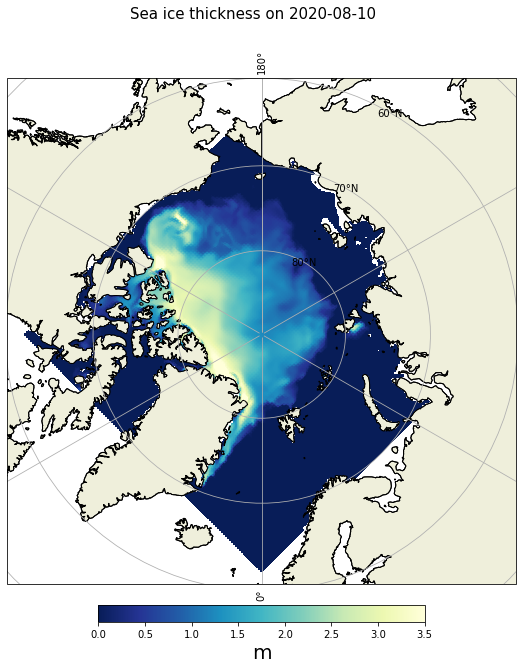

In [ ]:
# Select the date to consider
date = '2020-08-10'
ice_thick = mod.sel(time=date,method='nearest')['sithick']

# Create a figure, two subplots and define their size and projection
f,ax = plt.subplots(1,1, figsize=(10,10),subplot_kw=dict(projection=ccrs.Stereographic(central_longitude=0,central_latitude=90)))

# Define the characteristics of the plot
ax.coastlines()                                                    # add the coastlines
gl = ax.gridlines(draw_labels=True)                                # add the longitude / latitude lines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')             # add land mask
ax.set_extent([-180,180, 60, 90],crs=ccrs.PlateCarree())           # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Display the sea ice thickness for the two periods
im = ax.pcolormesh(ice_thick['longitude'].values, ice_thick['latitude'].values,ice_thick,
                           cmap='YlGnBu_r',vmin=0,vmax=3.5,transform=ccrs.PlateCarree())

# Add the colorbars
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')      # add the colorbar
cbar.set_label('m',fontsize=20)                                                  # add the title of the colorbar

# Add the titles
f.suptitle('Sea ice thickness on {}'.format(date),fontsize=15)

<div class="alert alert-block alert-info">
<b>Exercise</b><br>
    
---

    
Copy the previous cell and try to visualize some other ocean parameters, to change the color bar min and max values or the color map. You can also change the extent of the map and try to zoom on a specific region.
</div>

## 4.3. Specificities of the polar products
[Go back to the "Table of contents"](#Table-of-contents)

In the Arctic products, the longitude and latitude are not dimensions but only coordinates which depend on the x and y dimension. As mentioned in the [product](https://resources.marine.copernicus.eu/product-detail/ARCTIC_MULTIYEAR_PHY_002_003/INFORMATION) the coordinate reference system is **Polar stereographic North**. This way, the products is represented on a regular grid, and the number of point / km² does not depend on the latitude. In this section, we compare the grids from the Arctic satellite (**Polar stereographic North** coordinate system) product and from a [global model](https://resources.marine.copernicus.eu/product-detail/GLOBAL_REANALYSIS_PHY_001_026/INFORMATION) (**WGS 84 (EPSG 4326)** coordinate system) which we open with OPeNDAP !

In [ ]:
# Open the global model
mod_global = xr.open_dataset('https://nrt.cmems-du.eu/thredds/dodsC/MetO-GLO-PHY-CPL-hi-CUR')

# Display its content
mod_global

<xarray.Dataset>
Dimensions:  (lat: 692, lon: 1440, time: 39768)
Coordinates:
  * lat      (lat) float32 -83.0 -82.75 -82.5 -82.25 ... 89.0 89.25 89.5 89.75
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time     (time) datetime64[ns] 2017-07-09T00:40:00 ... 2022-01-20T23:40:00
Data variables:
    vo       (time, lat, lon) float32 ...
    uo       (time, lat, lon) float32 ...
Attributes: (12/16)
    Conventions:         CF-1.0
    title:               hourly-instantaneous horizontal velocity (2D)
    references:          http://marine.copernicus.eu
    institution:         UK Met Office
    contact:             servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:   netCDF-4
    ...                  ...
    grid_resolution:     lat-lon 1/4 degree
    start_date:          2022-01-20
    start_time:          00:00Z
    stop_date:           2022-01-20
    stop_time:           23:59Z
    file_quality_index:  0

In [ ]:
# Create the lon/lat grid
lon = np.tile(mod_global.lon.values,(1,len(mod_global.lat)))
lat = np.tile(mod_global.lat.values,(1,len(mod_global.lon)))

Text(0.5, 1.0, 'Global grid : lon/lat coordinates')

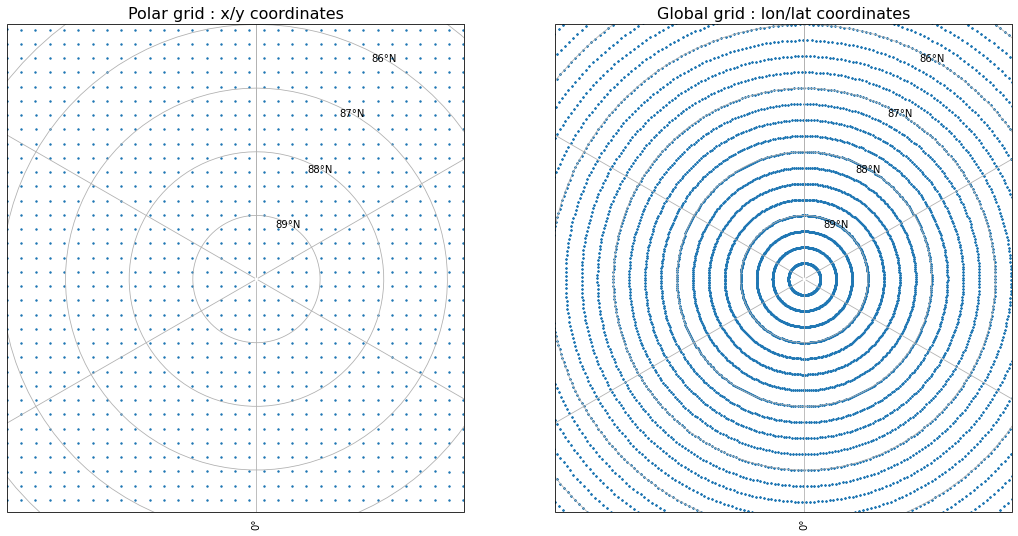

In [ ]:
# Define the characateristics of the plot
f,axs = plt.subplots(1,2, figsize=(18,12),subplot_kw=dict(projection=ccrs.NorthPolarStereo()))  # create a figure and define its size and projection

for ax in axs :
    ax.coastlines()                                                    # add the coastlines
    gl = ax.gridlines(draw_labels=True)                                # add the longitude / latitude lines
    gl.right_labels = False                                            # remove latitude labels on the right
    gl.top_labels = False                                              # remove longitude labels on the top
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')             # add land mask
    ax.set_extent([-180, 180, 86, 90],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the points of the polar and global grids
im1 = axs[0].scatter(sat['lon'].values, sat['lat'].values, 2,transform=ccrs.PlateCarree())
im2 = axs[1].scatter(lon,lat, 1,transform=ccrs.PlateCarree())
# Add the titles and legend
axs[0].set_title('Polar grid : x/y coordinates',fontsize=16)
axs[1].set_title('Global grid : lon/lat coordinates',fontsize=16)

As you can see, on the Arctic products (plot on the left), we have a very regular grid whereas in global products (plot on the right) we have fewer points in the lowest latitudes than in the highest one.

## 4.4. Change the map's projection
[Go back to the "Table of contents"](#Table-of-contents)

There are several ways to display the Arctic ocean on maps with Python and its module Cartopy. The list of the available projections can be found in [Cartopy documentation](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html). Here is a brief summary of the projections which may be useful for the Arctic Ocean study.


| Projection | Characteristics | Parameters |
| :---: | :---| :---|
| **NorthPolarStereo** | Square map, centered on the pole | central_longitude
| **Stereographic** | Round map above a specified point |central_latitude, central_longitude |
| **NearsidePerspective** | Round map above a specified point from a specified distance | central_longitude, central_latitude, satellite_height |

Let's see how they can be used.

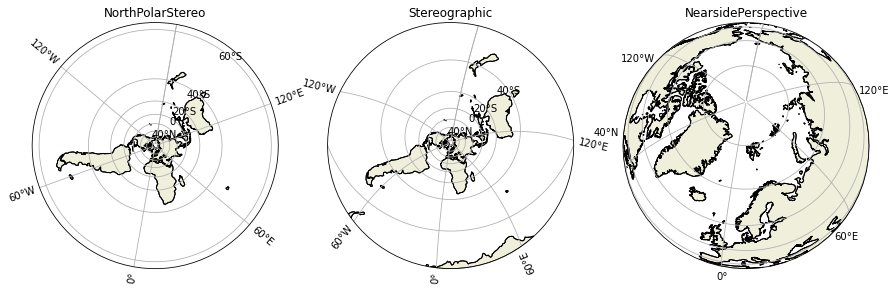

In [ ]:
projections = [ccrs.NorthPolarStereo(central_longitude=10.0),
              ccrs.Stereographic(central_longitude=10.0, central_latitude=80),
              ccrs.NearsidePerspective(central_longitude=10.0, central_latitude=80, satellite_height=3785831, false_easting=0, false_northing=0, globe=None)
              ]
titles = ['NorthPolarStereo','Stereographic','NearsidePerspective']

f = plt.figure(figsize=(15, 14))
for i in range(3) :
    ax = f.add_subplot(1,3,i+1,projection=projections[i])                      # the figure will be composed of 1x3 maps
    ax.coastlines()                                                                # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                    # add the longitude / latitude lines
    gl.right_labels = False                                                        # remove latitude labels on the right
    gl.top_labels = False                                                          # remove longitude labels on the top
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                         # add land mask
    ax.set_title(titles[i])
    #ax.pcolormesh(ice_thickness_mod['longitude'].values, ice_thickness_mod['latitude'].values,ice_thickness_mod, cmap='YlGnBu_r',vmin=0,vmax=5, transform=ccrs.PlateCarree())



## 4.5. Subset the dataset along coordinates
[Go back to the "Table of contents"](#Table-of-contents)

We have seen previously how to select a precise date from the dataset, and we may want to apply the same operation with the longitude and latitude, to study one specific point of interest. As longitude and latitudes are not dimensions but only coordinates, this selection operation requires a small manipulation using the method [`xarray.where`](https://xarray.pydata.org/en/stable/generated/xarray.where.html). In the following cell, set the coordinates of the point to study, we calculate the minimum distance of this point to a point of the grid with the [`xarray.Dataset.min()`](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.min.html) method, and finally select this closest point.

In [ ]:
# Define the longitude and latitude to plot
lon, lat = 42, 85

# Calculate the distance of the point to each point of the grid
distance = ((sat.lon-lon)**2+(sat.lat-lat)**2)**0.5

# Find the minimum distance
distance_min = distance.min()

# Select the dataset for the minimum distance
sat_point = sat.where(distance==distance_min,drop=True).squeeze()

# Display the result
sat_point

<xarray.Dataset>
Dimensions:                 (time: 90)
Coordinates:
    yc                      float64 -437.5
    lon                     float64 41.53
    xc                      float64 387.5
  * time                    (time) datetime64[ns] 2002-10-01 ... 2015-03-01
    lat                     float64 84.77
Data variables:
    Lambert_Azimuthal_Grid  float64 -127.0
    sea_ice_thickness       (time) float32 nan nan nan nan ... 2.007 2.336 2.715
Attributes: (12/43)
    title:                                   Sea Ice Thickness Climate Data R...
    institution:                             Alfred-Wegener-Institut Helmholt...
    source:                                  Altimetry: cryosat2, Snow depth:...
    FROM_ORIGINAL_FILE__platform:            CryoSat-2
    sensor:                                  SIRAL
    history:                                 20180425T193740Z (created)
    ...                                      ...
    time_coverage_duration:                  P1M
    time_coverage_resolution:                P1M
    standard_name_vocabulary:                CF
    license:                                 Creative Commons Attribution 4.0...
    _CoordSysBuilder:                        ucar.nc2.dataset.conv.CF1Convention
    Conventions:                             CF-1.0

## 4.6. Plot a time series
[Go back to the "Table of contents"](#Table-of-contents)

We will now plot a time series, to see how the sea ice thickness has evolved during the year 2020 at one point, according to the satellite observation product which contains the monthly means ice thickness values. The following cells show you how to select a location where to study the sea ice thickness evolution and how to plot a time series, using the `matplotlib.pyplot` function [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [ ]:
sat

<xarray.Dataset>
Dimensions:                 (yc: 178, xc: 178, time: 90)
Coordinates:
  * yc                      (yc) float64 2.212e+03 2.188e+03 ... -2.212e+03
    lon                     (yc, xc) float64 -135.0 -135.3 -135.7 ... 44.67 45.0
  * xc                      (xc) float64 -2.212e+03 -2.188e+03 ... 2.212e+03
  * time                    (time) datetime64[ns] 2002-10-01 ... 2015-03-01
    lat                     (yc, xc) float64 61.68 61.84 62.0 ... 61.84 61.68
Data variables:
    Lambert_Azimuthal_Grid  int8 -127
    sea_ice_thickness       (time, yc, xc) float32 ...
Attributes: (12/43)
    title:                                   Sea Ice Thickness Climate Data R...
    institution:                             Alfred-Wegener-Institut Helmholt...
    source:                                  Altimetry: cryosat2, Snow depth:...
    FROM_ORIGINAL_FILE__platform:            CryoSat-2
    sensor:                                  SIRAL
    history:                                 20180425T193740Z (created)
    ...                                      ...
    time_coverage_duration:                  P1M
    time_coverage_resolution:                P1M
    standard_name_vocabulary:                CF
    license:                                 Creative Commons Attribution 4.0...
    _CoordSysBuilder:                        ucar.nc2.dataset.conv.CF1Convention
    Conventions:                             CF-1.0

In [ ]:
# Define the longitude and latitude to plot
lon, lat = -9, 78

# Calculate the distance of the point to each point of the grid
distance = ((sat.lon-lon)**2+(sat.lat-lat)**2)**0.5

# Find the minimum distance
distance_min = distance.min()

# Select the dataset for the minimum distance
sat_point = sat.where(distance==distance_min,drop=True).squeeze()

sat_point

<xarray.Dataset>
Dimensions:                 (time: 90)
Coordinates:
    yc                      float64 -1.338e+03
    lon                     float64 -9.028
    xc                      float64 -212.5
  * time                    (time) datetime64[ns] 2002-10-01 ... 2015-03-01
    lat                     float64 77.85
Data variables:
    Lambert_Azimuthal_Grid  float64 -127.0
    sea_ice_thickness       (time) float32 nan 1.573 0.9067 ... 2.733 2.788
Attributes: (12/43)
    title:                                   Sea Ice Thickness Climate Data R...
    institution:                             Alfred-Wegener-Institut Helmholt...
    source:                                  Altimetry: cryosat2, Snow depth:...
    FROM_ORIGINAL_FILE__platform:            CryoSat-2
    sensor:                                  SIRAL
    history:                                 20180425T193740Z (created)
    ...                                      ...
    time_coverage_duration:                  P1M
    time_coverage_resolution:                P1M
    standard_name_vocabulary:                CF
    license:                                 Creative Commons Attribution 4.0...
    _CoordSysBuilder:                        ucar.nc2.dataset.conv.CF1Convention
    Conventions:                             CF-1.0

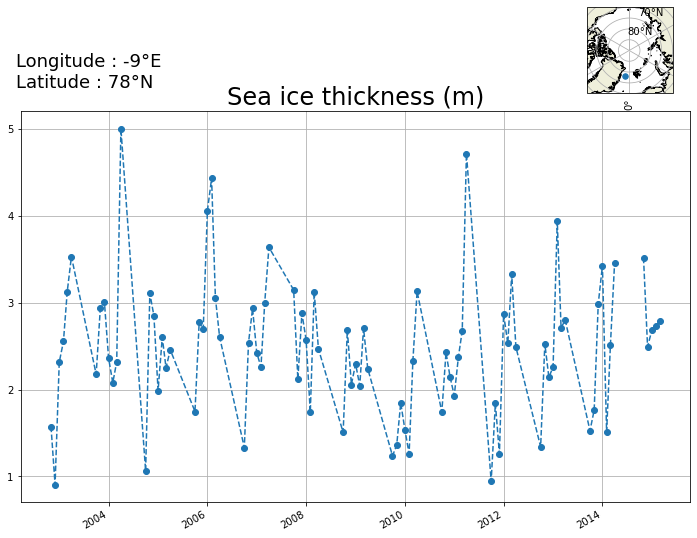

In [ ]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(12,8))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Sea ice thickness (m)",fontsize=24)             # add the figure title
f.suptitle('Longitude : ' +str(lon) +'°E\nLatitude : ' + str(lat)+'°N',
           fontsize=18,horizontalalignment='left',x=0.12)            # Display the coordinates on the plot
f.autofmt_xdate()                                                    # format the dates in the x axis
im = ax.plot(sat_point['time'],sat_point['sea_ice_thickness'],'o--')                              # plot the time serie

# Display the location of the point on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.NorthPolarStereo())  # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                  # add land mask
ax_mini_map.set_extent([-180, 180, 70 , 90],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon, lat, 30,transform=ccrs.PlateCarree())           # plot the location of the point

# Save figure
plt.savefig('out/temp_time_series.png')

<div class="alert alert-block alert-info">
<b>Exercise</b><br>
    
---

    
Copy the previous cell and try to plot the time series at another location or over another time period.
</div>

## 4.7. Plot vertical profiles
[Go back to the "Table of contents"](#Table-of-contents)

We are now going to use the in-situ profiler observation to plot salinity vertical profiles. A profiler is an instruments which repeatedly measures the ocean parameters up and down through almost the entire water column. In the dataset we are studying here, the profiler has measured the salinity at several times and for several depths. In the following cells, we will visualize the location of the instrument and plot the vertical profiles of salinity it has measured on two measurements. Again, we use the `matplotlib.pyplot` function [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [ ]:
# Set the indexes of the measures to consider
idx_1, idx_2 = 0, 9

# Get the dates of these measures
date_1, date_2 = profiler['TIME'][idx_1].data, profiler['TIME'][idx_2].data

# Get the location of the glider for these measures
lon1,lat1 = profiler['LONGITUDE'][idx_1],profiler['LATITUDE'][idx_1]
lon2,lat2 = profiler['LONGITUDE'][idx_2],profiler['LATITUDE'][idx_2]

# Get the salinity measured
sal_prof_1 = profiler["PSAL"].isel(TIME=[idx_1]).squeeze()
sal_prof_2 = profiler["PSAL"].isel(TIME=[idx_2]).squeeze()


# Check the variable
sal_prof_2

<xarray.DataArray 'PSAL' (DEPTH: 2562)>
array([34.715, 34.714, 34.714, ...,    nan,    nan,    nan])
Coordinates:
    TIME     datetime64[ns] 2017-11-10T05:55:50
Dimensions without coordinates: DEPTH
Attributes:
    standard_name:        sea_water_practical_salinity
    long_name:            Practical salinity
    units:                0.001
    valid_min:            2000
    valid_max:            41000
    ancillary_variables:  PSAL_QC PSAL_DM
    data_mode:            D

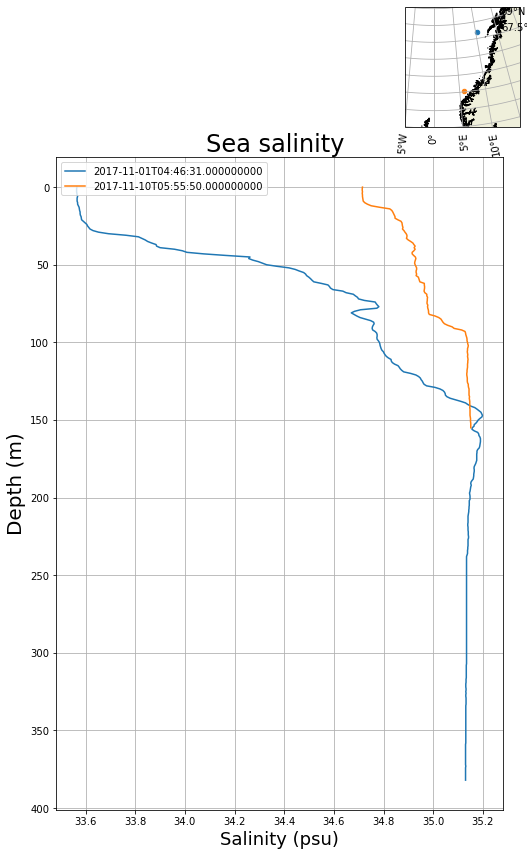

In [ ]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(8,12))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Sea salinity ",fontsize=24)                     # add the figure title
ax.invert_yaxis()                                                    # reverse the y axis
ax.set_xlabel("Salinity (psu)",fontsize=18)                        # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20)                               # set y axis label

im1 = ax.plot(sal_prof_1,sal_prof_2['DEPTH'],label=date_1)                              # plot the vertical profile
im2 = ax.plot(sal_prof_2,sal_prof_2['DEPTH'],label=date_2)                              # plot the vertical profile


# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.NorthPolarStereo()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                  # add land mask
ax_mini_map.set_extent([-5, 15, 60, 70],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon1, lat1, 20,transform=ccrs.PlateCarree())         # plot the first location
ax_mini_map.scatter(lon2, lat2, 20,transform=ccrs.PlateCarree())         # plot the second location
ax.legend(loc="upper left")                                              # add the legend

#Save figure
plt.savefig('out/sal_vertical_profile.png')

<div class="alert alert-block alert-info">
<b>Exercise</b><br>
    
---

Copy the previous cell and try to plot some other indexes, or even all the indexes !
</div>

## 4.8. Plot vertical slices
[Go back to the "Table of contents"](#Table-of-contents)

In this section we are going to plot the salinity on a vertical slice along a line. We will define the coordinates of the line, extract the product's data along this line and then display the salinity.

In [ ]:
# See the variables of the mod dataset
mod

<xarray.Dataset>
Dimensions:        (depth: 40, time: 12, y: 359, x: 359)
Coordinates:
  * depth          (depth) float32 0.0 2.0 3.0 4.0 ... 2e+03 3e+03 3.5e+03 4e+03
    latitude       (y, x) float32 ...
  * x              (x) float32 -22.38 -22.25 -22.12 -22.0 ... 22.12 22.25 22.38
  * y              (y) float32 -22.38 -22.25 -22.12 -22.0 ... 22.12 22.25 22.38
  * time           (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15
    longitude      (y, x) float32 ...
Data variables:
    stereographic  int32 -2147483647
    siconc         (time, y, x) float32 ...
    model_depth    (y, x) float32 ...
    sithick        (time, y, x) float32 0.5504 0.5445 0.5444 ... nan nan nan
    so             (time, depth, y, x) float32 ...
Attributes:
    institution:                     NERSC, Thormoehlens gate 47, N-5006 Berg...
    history:                         20211013:Created by program hyc2proj, ve...
    source:                          NERSC-HYCOM model fields
    references:                      http://topaz.nersc.no
    FROM_ORIGINAL_FILE__field_type:  Files based on file type nersc_weekly
    Conventions:                     CF-1.4
    title:                           Arctic Ocean Physics Reanalysis, 12.5km ...
    field_date:                      2020-12-15
    version:                         v4b
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    comment:

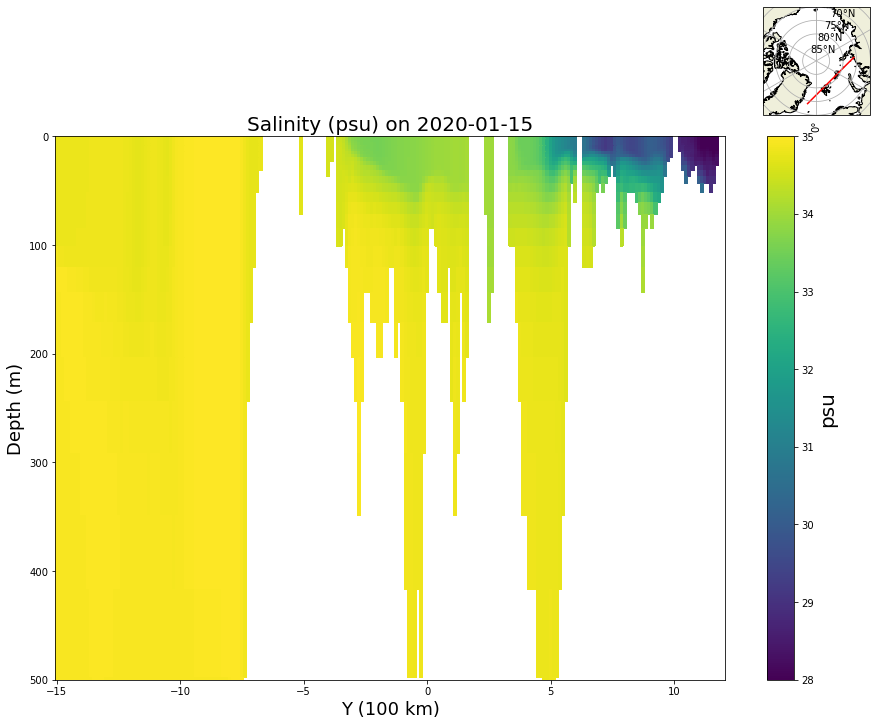

In [ ]:
# Set the coordinates of the line
x = 10
y_min, y_max = -15,12

# Get the salinity values along this line for a defined date
sal_mod = mod['so'].sel(x=x,method='nearest').sel(y=slice(y_min,y_max)).isel(time=[0]).squeeze()

# Get the datetime
date = np.datetime_as_string(sal_mod['time'].data,unit='D')

# Define the caracteristics of the plot
f = plt.figure(figsize=(15,10))                                      # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.set_title("Salinity (psu) on "+ date,fontsize=20)                 # set the title of the figure
ax.set_ylabel("Depth (m)",fontsize=18)                               # set the  y axis label
ax.set_xlabel("Y (100 km)",fontsize=18)                              # set the  y axis label
ax.set_ylim([0,500])
ax.invert_yaxis()                                                    # reverse the y axis

im = ax.pcolor(sal_mod['y'],sal_mod['depth'],sal_mod,vmin = 28,vmax=35)          # display the salinity
cbar = f.colorbar(im,ax=ax)                                          # add the colorbar
cbar.set_label('psu',fontsize=20)                                    # add the title of the colorbar

# Display the locations of the line on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.NorthPolarStereo()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                  # add land mask
ax_mini_map.set_extent([-180, 180, 70, 90],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.plot(sal_mod.longitude,sal_mod.latitude,'r',transform=ccrs.PlateCarree())         # add the location of the line on the mini map

# Save figure
plt.savefig('out/sal_slice.png')

<div class="alert alert-block alert-info">
<b>Exercise</b><br>
    
---

    
Copy the previous cell and try to study another location!
</div>

## 4.9. Create an animation
[Go back to the "Table of contents"](#Table-of-contents)

In this section, we are going to visualize the evolution of the previous vertical slice over time, thanks to an animation. There are several ways to display an animation with Python. Here, we will create <i>png</i> images and merge them as a succession of images into a <i>GIF</i> file. We will reuse the script of the previous section and loop over the dates.

In [ ]:
# Set the coordinates of the line
x = 10
y_min, y_max = -15,12

for i in range(len(mod['time'])):

    # Get the salinity values along this line for a defined date
    sal_mod = mod.sel(x=x,method='nearest').sel(y=slice(y_min,y_max)).isel(time=[i]).squeeze()

    # Get the datetime
    date = np.datetime_as_string(sal_mod['time'].data,unit='D')

    # Define the caracteristics of the plot
    f = plt.figure(figsize=(15,10))                                      # create a figure and define its size
    ax = f.add_subplot(111)                                              # create the axes of the plot
    ax.set_title("Salinity (psu) on "+ date,fontsize=20)                 # set the title of the figure
    ax.set_ylabel("Depth (m)",fontsize=18)                               # set the  y axis label
    ax.set_xlabel("Y (100 km)",fontsize=18)                              # set the  y axis label
    ax.set_ylim([0,500])
    ax.invert_yaxis()                                                    # reverse the y axis

    im = ax.pcolor(sal_mod['y'],sal_mod['depth'],sal_mod['so'],vmin = 28,vmax=35) # display the salinity
    cbar = f.colorbar(im,ax=ax)                                                   # add the colorbar
    cbar.set_label('psu',fontsize=20)                                             # add the title of the colorbar

    # Display the locations of the line on a mini map
    ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.NorthPolarStereo()) # create the minimap and define its projection
    gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
    gl.right_labels = False                                                          # remove latitude labels on the right
    gl.top_labels = False                                                            # remove longitude labels on the top
    ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                  # add land mask
    ax_mini_map.set_extent([-180, 180, 70, 90],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
    ax_mini_map.plot(sal_mod.longitude,sal_mod.latitude,'r',transform=ccrs.PlateCarree())                        # add the location of the line on the mini map

    # Save figure
    plt.savefig("out/animation/vertical_slice_"+str(i)+'.png')    # save the figure
    print("Figure for {} generated".format(date))                 # print a message when a figure is generated
    plt.close()                                                   # do not display the figure

Figure for 2020-01-15 generated
Figure for 2020-02-15 generated
Figure for 2020-03-15 generated
Figure for 2020-04-15 generated
Figure for 2020-05-15 generated
Figure for 2020-06-15 generated
Figure for 2020-07-15 generated
Figure for 2020-08-15 generated
Figure for 2020-09-15 generated
Figure for 2020-10-15 generated
Figure for 2020-11-15 generated
Figure for 2020-12-15 generated


All the figures have been created and saved. We will now import the required modules first to create the animation, then search all png files whose name starts with `vertical_slice`, as this is how we have named the individual figures. We then collect the names in `image_list`, and then the animation will be displayed.

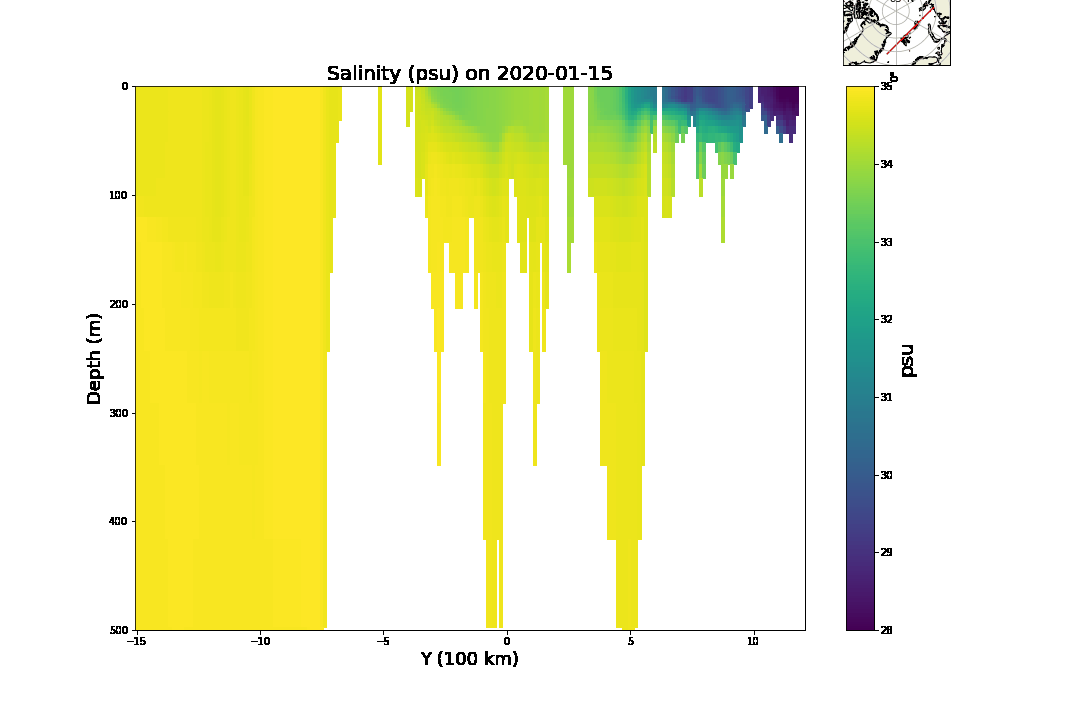

In [ ]:
# Import the modules for the animation
import imageio
from pathlib import Path
from IPython.display import Image

# Search image files
image_path = Path('out/animation')
images = sorted(image_path.glob('vertical_slice_*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))


# Save the GIF
imageio.mimwrite('out/animation/animated_vertical_slice.gif',image_list,duration=0.5,loop=10)

# Visualisation
with open('out/animation/animated_vertical_slice.gif','rb') as f:
    display(Image(data=f.read(),format='png'))

# 5. Conclusion
[Go back to the "Table of contents"](#Table-of-contents)

This notebook has taught you the fundamentals of Python to use the Copernicus Marine Service products. We have seen several ways to download and access the products and how to subset them, we have learned how NetCDF files are constructed and we have plotted various figures to visualize the parameters of the Arctic Ocean.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
---

##### And thank you for your attention! :)
    
    
We hope you enjoyed this first Jupyter Notebook training on the Arctic Ocean.

You now have all the tools you need to dive into the Copernicus Marine Service catalogue, explore new products, new ocean parameters and analyse more deeply the Arctic Ocean. Feel free to re-use and adapt all the Python scripts of this notebook to your needs !

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us at [servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu) !


